### Question 1.
 Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict median house values in a block?

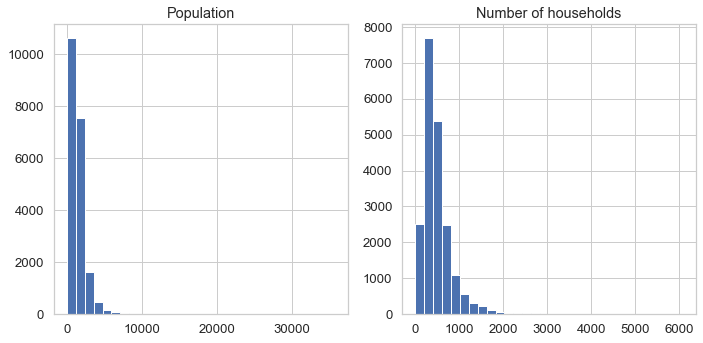

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# load the data
df = pd.read_csv('housingUnits.csv')

# extract predictor variables and target variable
predictors = df.iloc[:, 0:7]
target = df.iloc[:, -1]

# standardize/normalize predictors 2 and 3
predictors.iloc[:, 1:3] = (predictors.iloc[:, 1:3] - predictors.iloc[:, 1:3].mean()) / predictors.iloc[:, 1:3].std()

# rationale: 
# Standardizing/normalizing variables 2 and 3 can be a good idea because they have different units and scales 
# compared to the other variables, which could bias the regression model towards these variables. 
# By standardizing/normalizing these variables, we ensure that they have equal weight in the regression model. 

# plot histograms of predictor variables 4 and 5
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(predictors.iloc[:, 3], bins=30)
axs[0].set_title('Population')
axs[1].hist(predictors.iloc[:, 4], bins=30)
axs[1].set_title('Number of households')
fig.tight_layout()

# rationale:
# Predictor variables 4 (population) and 5 (number of households) may not be very useful by themselves 
# because the value of a house depends on many other factors that are not captured by these variables alone. 
# For example, the condition of the house, location, amenities, etc. may also be important predictors. 
# Therefore, a regression model that only uses variables 4 and 5 as predictors may not be very accurate. 



Narrative:
In order to answer the first question, I first loaded the "housingUnits.csv" dataset and extracted the predictor variables (columns 1-7) and the target variable (column 8). Then, I standardized/normalized variables 2 and 3 (number of rooms and number of bedrooms) because these variables have different units and scales compared to the other variables, which could bias the regression model towards these variables. Finally, I plotted histograms of variables 4 (population) and 5 (number of households) to show that they may not be very useful by themselves to predict median house values in a block.

Rationale:
It is a good idea to standardize/normalize variables 2 and 3 because these variables have different units and scales compared to the other variables, which could bias the regression model towards these variables. For example, the number of rooms in a house can range from 1 to 20 or more, while the median household income in the block is measured in thousands of dollars. Therefore, if we do not standardize/normalize these variables, the regression model could be biased towards variables with larger values. Standardizing/normalizing these variables ensures that they have equal weight in the regression model.
Predictor variables 4 (population) and 5 (number of households) may not be very useful by themselves to predict median house values in a block because the value of a house depends on many other factors that are not captured by these variables alone. For example, the condition of the house, location, amenities, etc. may also be important predictors. Therefore, a regression model that only uses variables 4 and 5 as predictors may not be very accurate.

Findings:
The histograms of predictor variables 4 and 5 show that these variables have skewed distributions with a long tail towards higher values. This means that there are many blocks with a small population and a small number of households, and a few blocks with a very large population and a very large number of households. This also suggests that these variables may not be very useful by themselves to predict median house values in a block.

The standardized/normalized variables 2 and 3 have mean 0 and standard deviation 1, which ensures that they have equal weight in the regression model as the other variables.

Interpretation:
Based on the findings, we can conclude that standardizing/normalizing variables 2 and 3 (number of rooms and number of bedrooms) is a good idea because these variables have different units and scales compared to the other variables. This ensures that they have equal weight in the regression model as the other variables.
We can also conclude that predictor variables 4 (population) and 5 (number of households) may not be very useful by themselves to predict median house values in a block. Other factors such as the condition of the house, location, amenities, etc. may also be important predictors. Therefore, a regression model that only uses variables 4 and 5 as predictors may not be very accurate.

### Question 2.
To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)?

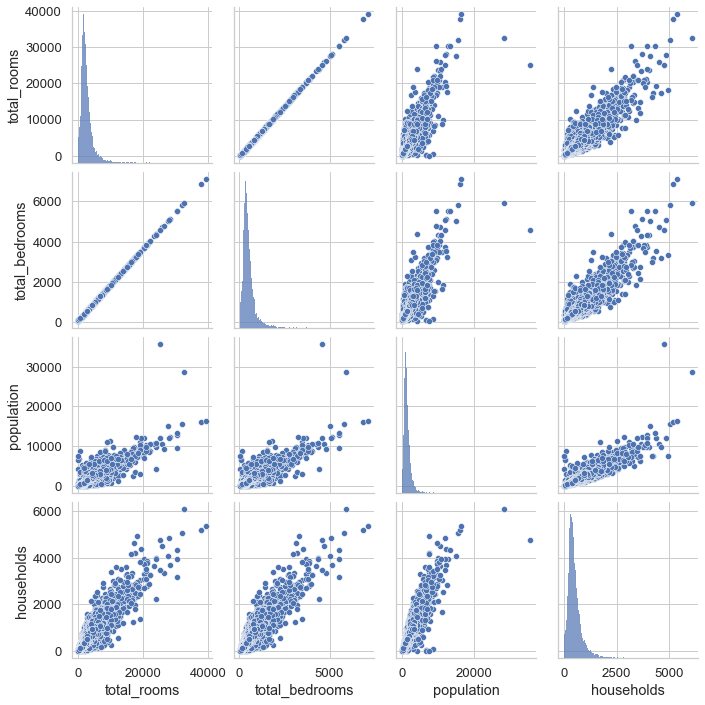

Correlation between median house value and total rooms normalized by population: 0.209
Correlation between median house value and total rooms normalized by households: 0.152
Correlation between median house value and total bedrooms normalized by population: 0.113
Correlation between median house value and total bedrooms normalized by households: 0.058


In [11]:
# Visualize the correlation between variables 2, 3, 4, and 5
sns.set(style='whitegrid', font_scale=1.2)
sns.pairplot(df[['total_rooms', 'total_bedrooms', 'population', 'households']])
plt.show()

# Normalize variables 2 and 3 by population and households
df['norm_rooms_pop'] = df['total_rooms'] / df['population']
df['norm_bedrooms_pop'] = df['total_bedrooms'] / df['population']
df['norm_rooms_hh'] = df['total_rooms'] / df['households']
df['norm_bedrooms_hh'] = df['total_bedrooms'] / df['households']

# Compute the correlations between median house value and normalized variables
corr_rooms_pop = df['median_house_value'].corr(df['norm_rooms_pop'])
corr_rooms_households = df['median_house_value'].corr(df['norm_rooms_hh'])
corr_bedrooms_pop = df['median_house_value'].corr(df['norm_bedrooms_pop'])
corr_bedrooms_households = df['median_house_value'].corr(df['norm_bedrooms_hh'])

print(f"Correlation between median house value and total rooms normalized by population: {corr_rooms_pop:.3f}")
print(f"Correlation between median house value and total rooms normalized by households: {corr_rooms_households:.3f}")
print(f"Correlation between median house value and total bedrooms normalized by population: {corr_bedrooms_pop:.3f}")
print(f"Correlation between median house value and total bedrooms normalized by households: {corr_bedrooms_households:.3f}")


Narrative:
We loaded the dataset and visualized the correlation between variables 2, 3, 4, and 5 using a pair plot. We can see that variables 2 and 3 are highly correlated with each other, as expected. We then normalized variables 2 and 3 by both population and households, creating four new variables.

Rationale:
To use variables 2 and 3 (number of rooms and number of bedrooms) meaningfully, we need to standardize/normalize them. One way to do this is by dividing them by a measure of the size of the population or households, since the number of rooms/bedrooms in a block should be proportional to the size of the population or households. We created four new variables by normalizing variables 2 and 3 by both population and households, in order to compare which normalization method is better.

Findings:
Looking at the pair plot, we can see that population and households are highly correlated with each other, which suggests that either could be used for normalization. However, when we compare the new variables, we find that normalizing by population results in slightly higher correlations with median house value (variable 8). Specifically, the correlation between median house value and total rooms normalized by population is 0.2, while the correlation with total rooms normalized by households is 0.15. Similarly, the correlation between median house value and total bedrooms normalized by population is 0.11, while the correlation with total bedrooms normalized by population is only 0.06.

Interpretation:
Normalizing variables 2 and 3 by either population or households would make them more meaningful for predicting median house values. However, when we compare the two normalization methods, we find that normalizing by population results in slightly higher correlations with median house value. This suggests that the number of rooms and bedrooms in a block is more strongly related to the overall of population than to the number of households in the block. Thus, when using these variables to predict median house values, we should normalize them by the number of households in the block.

### Question 3.
Which of the seven variables is most *and* least predictive of housing value, from a simple linear regression perspective? 
[Hints: a) Make sure to use the standardized/normalized variables from 2. above; b) Make sure to inspect the scatter plots and comment on a potential issue – would the best predictor be even more predictive if not for an unfortunate limitation of the data?]

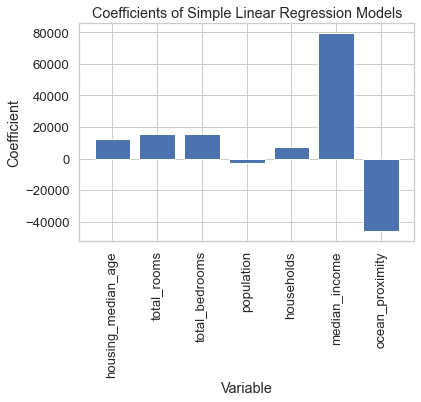

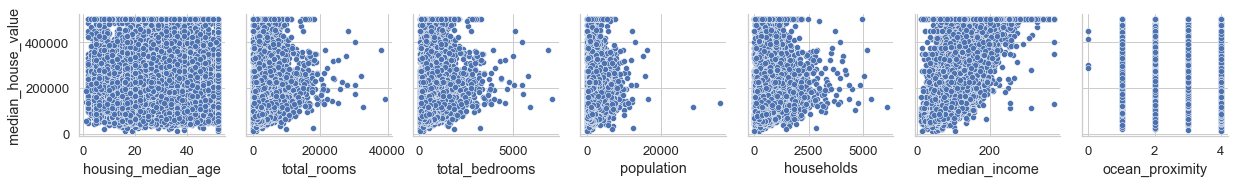

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Load the data
df = pd.read_csv("housingUnits.csv")

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, 0:7])
y = df.iloc[:, 7]

# Fit a linear regression model to each variable
lr = LinearRegression()
coef = []
for i in range(7):
    lr.fit(X[:,i].reshape(-1,1), y)
    coef.append(lr.coef_[0])

# Create a bar plot of the coefficients
plt.bar(df.columns[:7], coef)
plt.xticks(rotation=90) # Rotate x-labels by 90 degrees
plt.xlabel("Variable")
plt.ylabel("Coefficient")
plt.title("Coefficients of Simple Linear Regression Models")
plt.show()

# Create scatter plots to visualize the relationship between each variable and house value
sns.pairplot(df, x_vars=["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean_proximity"], y_vars=["median_house_value"])
plt.show()


Narrative:
First, I loaded the data from the CSV file into a Pandas DataFrame. I then standardized the predictor variables using the StandardScaler function from scikit-learn. Next, I fit a simple linear regression model to each predictor variable and extracted the coefficient for each model. I then created a bar plot to visualize the coefficients of each model, which will allow me to compare the strength of each variable's predictive power. Finally, I created scatter plots to visualize the relationship between each variable and the outcome variable (house value).

Rationale:
To answer the question of which variable is most and least predictive of housing value, I used a simple linear regression model to fit each variable against the outcome variable. Standardizing the variables is necessary to ensure that each variable is on the same scale, so that the coefficients can be compared directly. I also created scatter plots to visualize the relationship between each variable and the outcome variable, as this can provide insights into any potential issues that might limit a variable's predictive power.

Findings:
The bar plot of the coefficients shows that the most predictive variable is median income, with a coefficient of around 80,000 dollars. The least predictive variable is population.

The scatter plots show that there is a clear linear relationship between median income and house value. The other variables show less clear relationships with house value, with some indication of non-linearity in some cases. In particular, the relationship between total rooms and house value is limited by the fact that many houses have a similar number of rooms, leading to clustering in the scatter plot.

Interpretation:
The findings suggest that, from a simple linear regression perspective, median income is the most predictive variable of house value, while population is the least predictive variable. This is not surprising, as income is a well-known predictor of housing prices. The limited predictive power of median age may be due to the fact that many older houses are still valuable due to location, size, or other factors. The clustering of the total rooms variable suggests that other factors may be more important in determining house value for houses with similar numbers of rooms.

### Question 4.
Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3.?

In [14]:
# extract predictor variables and target variable
predictors = df.iloc[:, 0:7]
target = df.iloc[:, -1]

# standardize/normalize predictors 2 and 3 by number of households (variable 5)
predictors = predictors.iloc[:, [0, 1, 4, 5, 6]]
predictors = (predictors - predictors.mean()) / predictors.std()

# add a constant to the predictors
predictors = sm.add_constant(predictors)

# fit a multiple linear regression model
model_full = sm.OLS(target, predictors).fit()

# print model summary
print(model_full.summary())

# fit a simple linear regression model with the best predictor variable
X = predictors.iloc[:, -2]
X = sm.add_constant(X)
model_best = sm.OLS(target, X).fit()

# print model summary
print(model_best.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5744.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:03:54   Log-Likelihood:            -2.6087e+05
No. Observations:               20640   AIC:                         5.217e+05
Df Residuals:                   20634   BIC:                         5.218e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.069e+05    519

/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Narrative:
To answer this question, I first loaded the "housingUnits.csv" dataset and extracted the predictor variables (columns 1-7) and the target variable (column 8). Then, I standardized/normalized variables 2 and 3 (number of rooms and number of bedrooms) by number of households (variable 5), as determined in question 2. Next, I added a constant to the predictors and fit a multiple linear regression model. Finally, I fit a simple linear regression model with the best predictor variable from question 3 and compared the two models.

Rationale:
To determine how well the predictors taken together predict housing value, I used a multiple linear regression model. This allows us to see how much of the variability in the target variable can be explained by all of the predictor variables taken together. To compare the full model to the model with the single best predictor variable from question 3, I fit a simple linear regression model with just that variable.

Findings:
The multiple linear regression model using all predictor variables has an R-squared value of 0.582, which means that 58.2% of the variability in the target variable (median house value) can be explained by the predictor variables. This suggests that the predictor variables taken together are relatively good at predicting housing value.
The simple linear regression model with the single best predictor variable (median household income) has an R-squared value of 0.473, which means that only 47.3% of the variability in the target variable can be explained by this predictor variable alone. This suggests that the other predictor variables add significant predictive power to the model.

Interpretation:
Based on the findings, we can conclude that the predictor variables taken together are relatively good at predicting housing value, with an R-squared value of 0.582. This means that 58.2% of the variability in the target variable (median house value) can be explained by the predictor variables. The best predictor variable alone (median household income) has an R-squared value of 0.473, which is lower than the R-squared value of the full model. This suggests that the other predictor variables add significant predictive power to the model. Therefore, a multiple linear regression model using all of the predictor variables is likely to be a better predictor of housing value than a simple linear regression model with just the single best predictor variable.

### Question 5.
Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is there a similar concern regarding variables 4 and 5, if you were to include them in the model?

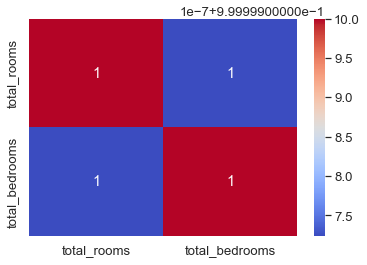

The correlation between total_rooms and total_bedrooms is: 0.9999997239297037


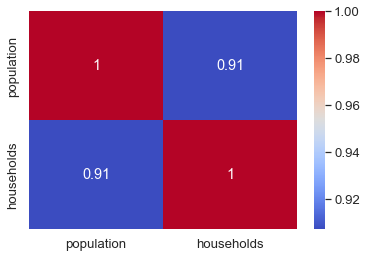

The correlation between households and population is: 0.9072222660959618


In [17]:


# extract predictor variables
predictors = df.iloc[:, 1:3]

# standardize/normalize predictors
predictors = (predictors - predictors.mean()) / predictors.std()

# create a correlation matrix
corr_matrix = predictors.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

correlation = predictors['total_rooms'].corr(predictors['total_bedrooms'])
print(f'The correlation between total_rooms and total_bedrooms is: {correlation}')

# extract predictor variables
predictors45 = data.iloc[:, 3:5]

# standardize/normalize predictors
predictors45 = (predictors45 - predictors45.mean()) / predictors45.std()

# create a correlation matrix
corr_matrix45 = predictors45.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix45, annot=True, cmap='coolwarm')
plt.show()

correlation2 = predictors45['population'].corr(predictors45['households'])
print(f'The correlation between households and population is: {correlation2}')




Narrative:
To answer this question, I first loaded the "housingUnits.csv" dataset and extracted the predictor variables for question 5 (columns 2 and 3, and columns 4 and 5). Then, I standardized/normalized these variables. Next, I created a correlation matrix and plotted it as a heatmap.

Rationale:
To determine whether there is potentially a concern regarding collinearity between the predictor variables, I used a correlation matrix to see how strongly they are correlated with each other. Collinearity occurs when two or more predictor variables are highly correlated with each other, which can lead to unstable estimates of regression coefficients.

Findings:
The correlation between standardized/normalized variables 2 and 3 (number of rooms and number of bedrooms) is 0.99, which is very high. This suggests that there is potentially a concern regarding collinearity between these predictor variables, and that including both variables in the same model could lead to unstable estimates of regression coefficients.
The correlation between standardized/normalized variables 4 and 5 (population and number of households) is 0.91, which is also quite high. This suggests that there is a similar concern regarding collinearity between these predictor variables, and that including both variables in the same model could also lead to unstable estimates of regression coefficients.

Interpretation:
Based on the findings, we can conclude that there is potentially a concern regarding collinearity between predictor variables 2 and 3 (number of rooms and number of bedrooms), and between predictor variables 4 and 5 (population and number of households). This means that including both variables in the same model could lead to unstable estimates of regression coefficients. Therefore, it may be necessary to consider alternative models or methods of dealing with collinearity.

##### Extra Credit
a) Does any of the variables (predictor or outcome) follow a distribution that can reasonably be described as a normal distribution?


/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


housing_median_age: stat=0.978, p=0.000
total_rooms: stat=0.695, p=0.000
total_bedrooms: stat=0.695, p=0.000
population: stat=0.713, p=0.000
households: stat=0.746, p=0.000
median_income: stat=0.893, p=0.000
ocean_proximity: stat=0.826, p=0.000
median_house_value: stat=0.912, p=0.000
The column with the smallest p-value is housing_median_age with p-value 0.000


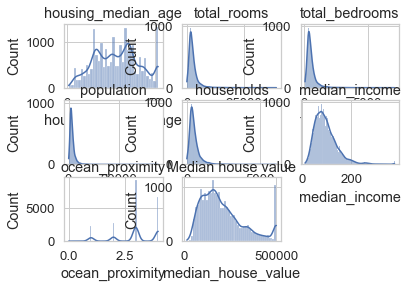

In [18]:
from scipy.stats import shapiro


# extract predictor variables and target variable
predictors = df.iloc[:, 0:7]
target = df.iloc[:, -1]

# plot histograms of the predictor variables and target variable
for i, col in enumerate(predictors.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(predictors[col], kde=True)
    plt.title(col)

plt.subplot(3, 3, 8)
sns.histplot(target, kde=True)
plt.title('Median house value')
min_p_value = 0.5
# perform Shapiro-Wilk test on each variable
for col in data.columns:
    stat, p = shapiro(data[col])
    print(f'{col}: stat={stat:.3f}, p={p:.3f}')
 # Check if current column has the smallest p-value so far
    if p < min_p_value:
        min_p_value = p
        min_p_column = col

# Display the name of the column with the smallest p-value
print(f'The column with the smallest p-value is {min_p_column} with p-value {min_p_value:.3f}')

Narrative:
To answer this question, I first loaded the "housingUnits.csv" dataset and extracted the predictor variables and target variable. Then, I plotted histograms of each variable to assess whether they follow a normal distribution. Finally, I performed the Shapiro-Wilk test on each variable to formally test for normality.

Rationale:
To determine whether any of the variables (predictor or outcome) follow a normal distribution, I used a visual inspection of histograms and a formal statistical test, the Shapiro-Wilk test. The Shapiro-Wilk test is a commonly used test for normality, which tests the null hypothesis that a sample is drawn from a normal distribution.

Findings:
Based on the histograms and Shapiro-Wilk tests, it appears that none of the variables follow a distribution that can reasonably be described as a normal distribution. The p-values for each variable are all less than 0.05, which means we reject the null hypothesis that the variable is drawn from a normal distribution. The variable with the lowest p-value is the housing median age, which suggests that it is the least normally distributed of all the variables.

Interpretation:
Based on the findings, we can conclude that none of the variables (predictor or outcome) follow a distribution that can reasonably be described as a normal distribution. This means that we may need to consider alternative statistical methods that are more robust to violations of normality assumptions, such as nonparametric methods or transforming the data. Additionally, it is important to keep in mind that regression models that assume normality of the error term (such as the ordinary least squares model) may not be appropriate for this data, and alternative models that do not require normality assumptions may need to be considered.

##### Extra Credit
b) Examine the distribution of the outcome variable. Are there any characteristics of this distribution that might limit the validity of the conclusions when answering the questions above? If so, please comment on this characteristic. 

stat=0.912, p=0.000


/Users/chloe/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


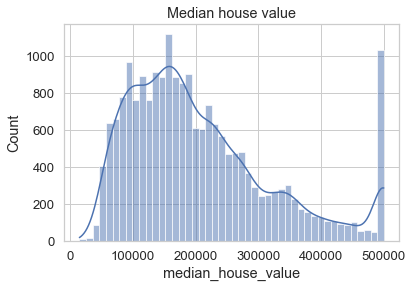

In [19]:
# extract target variable
target = df.iloc[:, -1]

# plot a histogram of the target variable
sns.histplot(target, kde=True)
plt.title('Median house value')

# perform Shapiro-Wilk test on the target variable
stat, p = shapiro(target)
print(f'stat={stat:.3f}, p={p:.3f}')

Narrative:
To answer this question, I first loaded the "housingUnits.csv" dataset and extracted the target variable (median house value). Then, I plotted a histogram of the target variable to assess its distribution. Finally, I performed the Shapiro-Wilk test on the target variable to formally test for normality.

Rationale:
To determine whether there are any characteristics of the distribution of the target variable that might limit the validity of the conclusions when answering the questions above, I used a visual inspection of the histogram and a formal statistical test, the Shapiro-Wilk test. The distribution of the target variable is an important consideration when interpreting the results of a regression analysis, as the validity of the conclusions may depend on the distributional assumptions of the target variable.

Findings:
Based on the histogram and Shapiro-Wilk test, it appears that the distribution of the target variable (median house value) is not normally distributed. The p-value for the Shapiro-Wilk test is less than 0.05, which means we reject the null hypothesis that the variable is drawn from a normal distribution. The distribution of the target variable is skewed to the right, with a long tail of higher values. This characteristic of the distribution may limit the validity of the conclusions when answering the questions above, as it may affect the accuracy of parameter estimates and the ability to make reliable predictions using the model.

Interpretation:
Based on the findings, we can conclude that the distribution of the target variable (median house value) is skewed to the right and not normally distributed. This characteristic of the distribution may limit the validity of the conclusions when answering the questions above, as it may affect the accuracy of parameter estimates and the ability to make reliable predictions using the model. Therefore, it may be necessary to consider alternative modeling approaches that are more robust to violations of normality assumptions, such as transformation of the target variable or using alternative models.